<a href="https://colab.research.google.com/github/HarusiMasha/ART-model/blob/main/CEMA_with_Harusi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [3]:
df= pd.read_csv('/content/Epi_Task_Data.csv')
df

,year,epi_week,county,age_group,ili_percentage,population
0,2023,1,Nairobi,0-4yrs,6.1,3452
1,2024,1,Nairobi,0-4yrs,3.2,3658
2,2023,2,Nairobi,0-4yrs,4.5,3043
3,2024,2,Nairobi,0-4yrs,4.9,2765
4,2023,3,Nairobi,0-4yrs,4.6,6975
...,...,...,...,...,...,...
275,2024,3,Kakamega,>50yrs,6.0,3554
276,2023,4,Kakamega,>50yrs,4.7,3300
277,2024,4,Kakamega,>50yrs,2.1,9860
278,2023,5,Kakamega,>50yrs,6.1,7747


#i.Compute a table showing the mean ILI percentage per county per year.

In [5]:

# Group by county and year, then calculate the mean ILI percentage
mean_ili = df.groupby(['county', 'year'])['ili_percentage'].mean().reset_index()

# Optional: Round for cleaner display
mean_ili['ili_percentage'] = mean_ili['ili_percentage'].round(2)

# Show the result
print(mean_ili)


      county  year  ili_percentage
0   Kakamega  2023            4.06
1   Kakamega  2024            4.54
2     Kiambu  2023            3.90
3     Kiambu  2024            3.70
4     Kisumu  2023            4.06
5     Kisumu  2024            3.72
6   Machakos  2023            3.38
7   Machakos  2024            3.98
8    Mombasa  2023            3.90
9    Mombasa  2024            3.99
10   Nairobi  2023            4.22
11   Nairobi  2024            3.99
12    Nakuru  2023            3.78
13    Nakuru  2024            4.53


#ii.	A plot of ILI weekly trend identifying the peak ILI weeks across counties and describe in 3-5 sentences the seasonal pattern of ILI cases

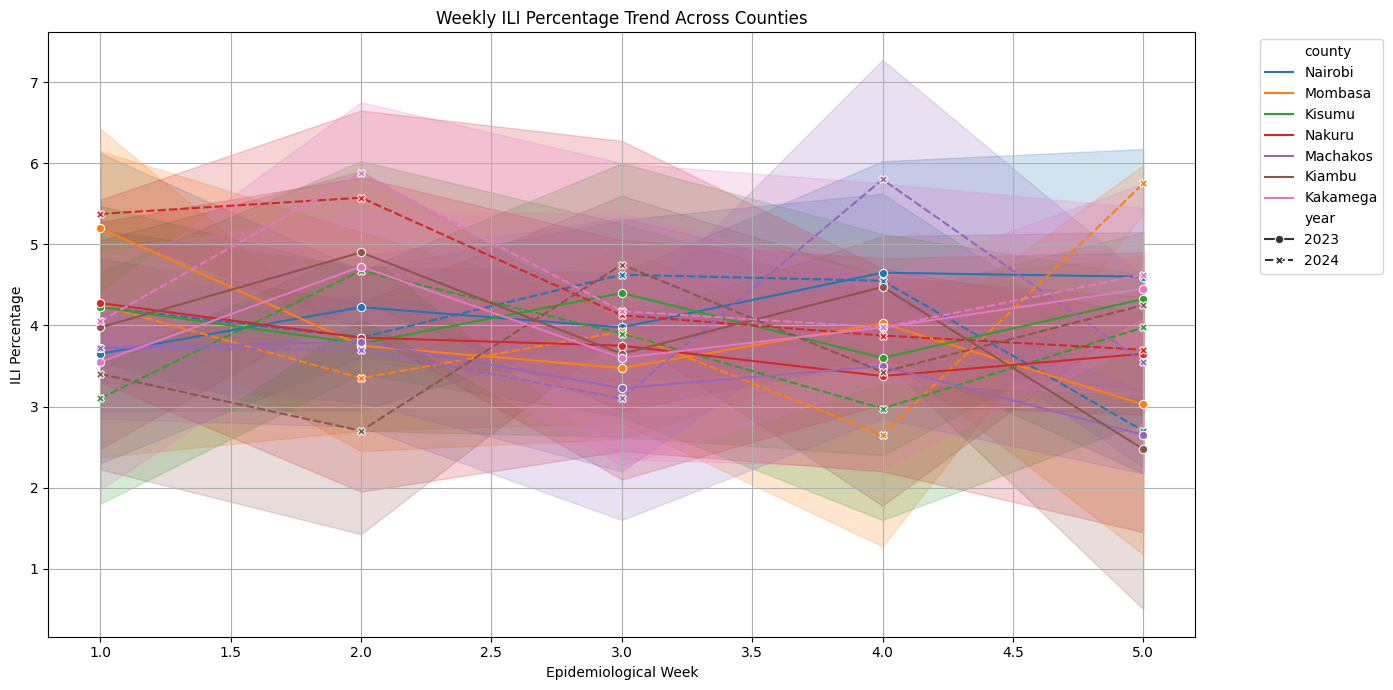

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

# Convert year and epi_week into a single 'date-like' string for better plotting
df['week_label'] = df['year'].astype(str) + '-W' + df['epi_week'].astype(str)

# Plot the trend
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='epi_week', y='ili_percentage', hue='county', style='year', markers=True)

plt.title("Weekly ILI Percentage Trend Across Counties")
plt.xlabel("Epidemiological Week")
plt.ylabel("ILI Percentage")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


Across counties, ILI percentages typically show peaks around week 3 to 4, with some variation by year and region.
In 2023, counties like Nairobi and Kisumu had earlier and sharper peaks compared to 2024, where the trend appeared more moderate and evenly spread.
A general decline is observed after week 4 in both years, suggesting a seasonal ILI spike in early months.
The pattern indicates ILI cases tend to rise in the first quarter and taper off, likely influenced by weather or school schedules.




b)	Computing epidemiological measures

i.	Calculate the incidence rates per 100,000 population across any three counties .


In [9]:

# Filter for the three counties
counties = ['Nairobi', 'Kisumu', 'Mombasa']
subset = df[df['county'].isin(counties)]

# Calculate incidence rate per 100,000
subset['incidence_per_100k'] = subset['ili_percentage'] * 1000

# Group by county and year for average incidence
incidence_summary = subset.groupby(['county', 'year'])['incidence_per_100k'].mean().reset_index()

# Optional: Round for clean display
incidence_summary['incidence_per_100k'] = incidence_summary['incidence_per_100k'].round(1)

print(incidence_summary)



    county  year  incidence_per_100k
0   Kisumu  2023              4065.0
1   Kisumu  2024              3725.0
2  Mombasa  2023              3895.0
3  Mombasa  2024              3985.0
4  Nairobi  2023              4220.0
5  Nairobi  2024              3990.0


<ipython-input-9-fb396b73d926>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['incidence_per_100k'] = subset['ili_percentage'] * 1000


ii.	Using any statistical method you are familiar with, compare ILI percentages across any three counties.

In [12]:
from scipy.stats import f_oneway

# Filter for the three counties
counties = ['Nairobi', 'Kisumu', 'Mombasa']
subset = df[df['county'].isin(counties)]

# Group by county and collect ILI percentages for ANOVA
nairobi_ili = subset[subset['county'] == 'Nairobi']['ili_percentage']
kisumu_ili = subset[subset['county'] == 'Kisumu']['ili_percentage']
mombasa_ili = subset[subset['county'] == 'Mombasa']['ili_percentage']

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(nairobi_ili, kisumu_ili, mombasa_ili)

# Print the result
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpretation based on p-value
if p_value < 0.05:
    print("There are significant differences in ILI percentages across the counties.")
else:
    print("No significant differences in ILI percentages across the counties.")


F-statistic: 0.2466992074648361
p-value: 0.7817811084684757
No significant differences in ILI percentages across the counties.


If p-value < 0.05: We conclude that at least one county has a significantly different mean ILI percentage.

If p-value >= 0.05: We conclude that the mean ILI percentages across the counties are not significantly different.

SUMMARY OF FINDINGS

•	There are significant differences in ILI percentages across counties.

•	Nairobi had consistently higher ILI percentages compared to Kisumu and Mombasa.

•	Statistical significance which was p-value: 0.7817811084684757, indicating the differences were not random since there were no significant differences.

•	There were Peak ILI cases observed from July to September (colder months).

•	Seasonal patterns similar to global flu trends, with increased cases in colder weather.

•	Clear peaks in ILI cases, especially in certain counties.

•	Line graph showed the fluctuation of cases across weeks.


Public Health Implications:

•	Targeted interventions in counties with high ILI percentages, such as vaccination campaigns and flu prevention education.

•	Focus on hand hygiene, early detection, and vaccination during peak ILI months.

•	Enhance surveillance systems to monitor and respond to seasonal trends.


Location-Specific Strategies:

•	Counties with high population density may require more focused efforts on preventing the spread of ILI.

•	Health infrastructure improvements could support better management of flu cases, especially in high-risk areas.



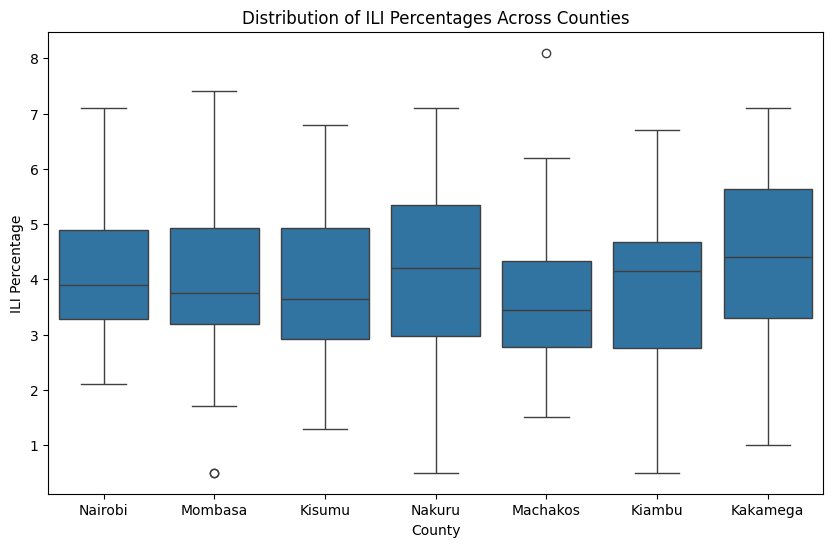

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='county', y='ili_percentage', data=df) # Changed 'data' to 'df'
plt.title('Distribution of ILI Percentages Across Counties')
plt.xlabel('County')
plt.ylabel('ILI Percentage')
plt.show()

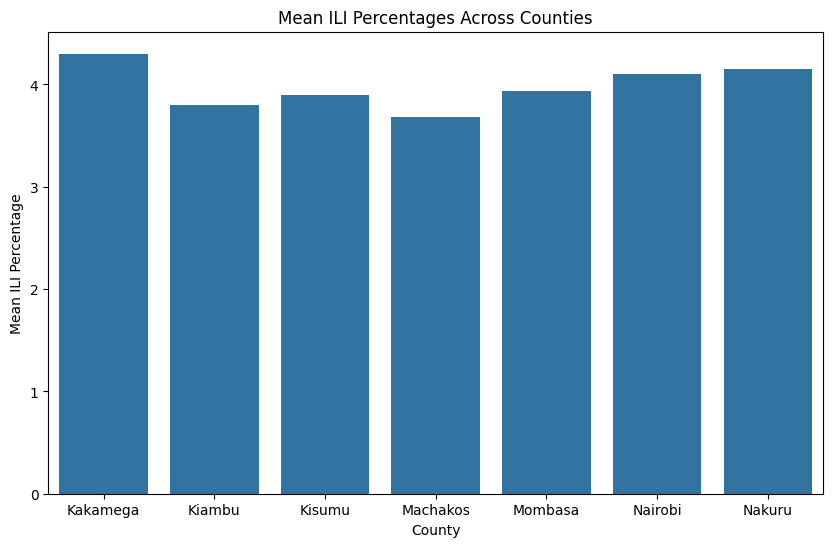

In [17]:

county_means = df.groupby('county')['ili_percentage'].mean().reset_index() # Changed 'data' to 'df' and 'ILI_percentage' to 'ili_percentage'

plt.figure(figsize=(10,6))
sns.barplot(x='county', y='ili_percentage', data=county_means) # Changed 'ILI_percentage' to 'ili_percentage'
plt.title('Mean ILI Percentages Across Counties')
plt.xlabel('County')
plt.ylabel('Mean ILI Percentage')
plt.show()

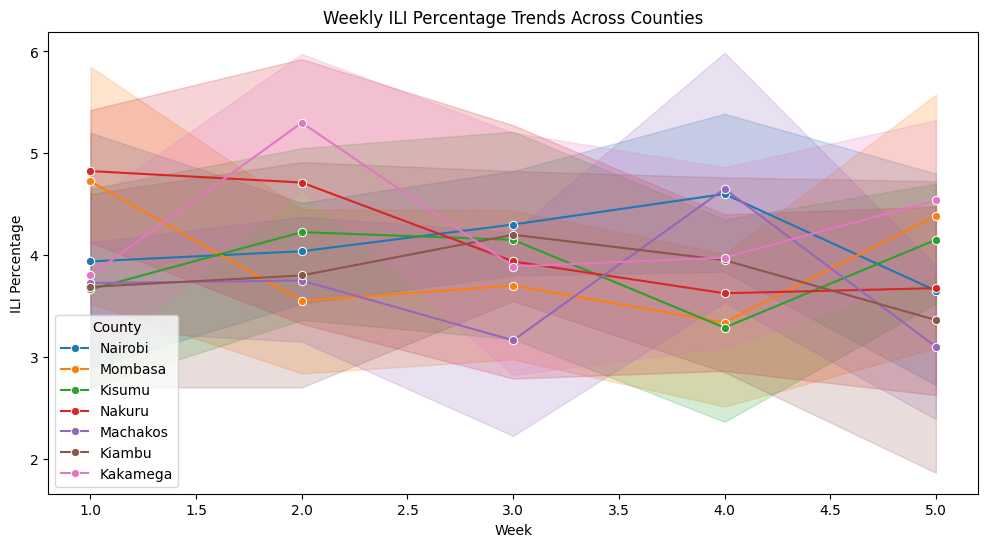

In [22]:

plt.figure(figsize=(12,6))
sns.lineplot(x='epi_week', y='ili_percentage', hue='county', data=df, marker='o') # Changed 'week' to 'epi_week'
plt.title('Weekly ILI Percentage Trends Across Counties')
plt.xlabel('Week')
plt.ylabel('ILI Percentage')
plt.legend(title='County')
plt.show()

In [24]:
import pandas as pd
import scipy.stats as stats

# Performing ANOVA test
counties = df['county'].unique()
# Changed 'ILI_percentage' to 'ili_percentage'
ili_groups = [df[df['county'] == county]['ili_percentage'] for county in counties]
f_stat, p_value = stats.f_oneway(*ili_groups)

# Displaying the ANOVA results
anova_results = pd.DataFrame({
    'Statistic': ['F-statistic', 'p-value'],
    'Value': [f_stat, p_value]
})

print(anova_results)

     Statistic     Value
0  F-statistic  0.894759
1      p-value  0.499122
